In [1]:
from dask import dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns

%matplotlib inline

path = '../data/'

df_sds011 = dd.read_csv(path + 'processed*sds011*').compute()
df_dht22 = dd.read_csv(path + 'processed*dht22*').compute()

df_sds011['timestamp'] = pd.to_datetime(df_sds011['timestamp'], format='%Y-%m-%dT%H:%M:%S')
df_dht22['timestamp'] = pd.to_datetime(df_dht22['timestamp'], format='%Y-%m-%dT%H:%M:%S')


#Problems when remove index category because of multi index
#df_sds011['location'] = df_sds011['location'].astype('category')
#df_dht22['location'] = df_dht22['location'].astype('category')

df_sds011 = df_sds011.set_index(['location', 'timestamp'])
df_dht22 = df_dht22.set_index(['location', 'timestamp'])

df_sds011 = df_sds011.sort_index()
df_dht22 = df_dht22.sort_index()

df_sds011 = df_sds011[['P1', 'P2']]
df_dht22 = df_dht22[['temperature', 'humidity']]

In [2]:
print(df_sds011.isnull().sum())
print(df_dht22.isnull().sum())

P1    0
P2    0
dtype: int64
temperature    0
humidity       0
dtype: int64


In [3]:
df_sds011.describe()

,P1,P2
count,739843.000000,739843.000000
mean,26.867225,15.717884
std,31.916156,17.506098
min,0.000000,0.000000
25%,6.920000,3.800000
50%,14.130000,8.330000
75%,35.530000,21.200000
max,1999.900000,564.800000


In [4]:
df_dht22.describe()

,temperature,humidity
count,743179.000000,743179.000000
mean,12.650757,80.143466
std,9.213619,23.280162
min,-10.400000,5.200000
25%,5.500000,62.600000
50%,10.800000,91.300000
75%,19.200000,99.900000
max,57.800000,99.900000


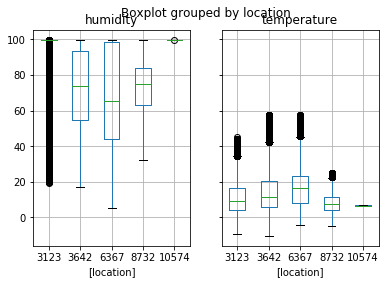

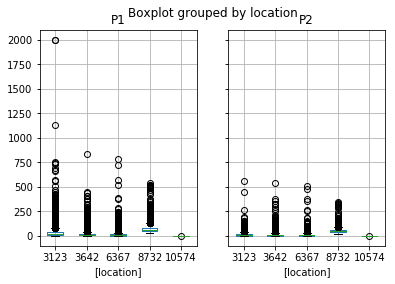

In [5]:
_ = df_dht22.boxplot(by='location')
_ = df_sds011.boxplot(by='location')

location
3123     AxesSubplot(0.125,0.125;0.775x0.755)
3642     AxesSubplot(0.125,0.125;0.775x0.755)
6367     AxesSubplot(0.125,0.125;0.775x0.755)
8732     AxesSubplot(0.125,0.125;0.775x0.755)
10574    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

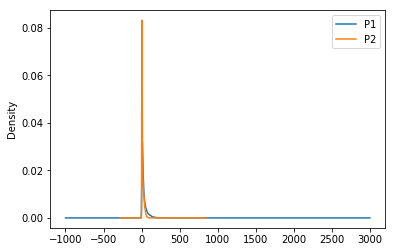

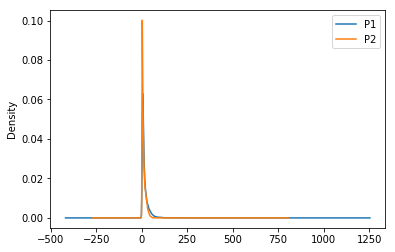

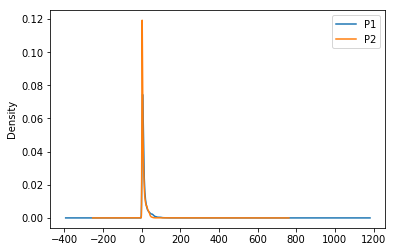

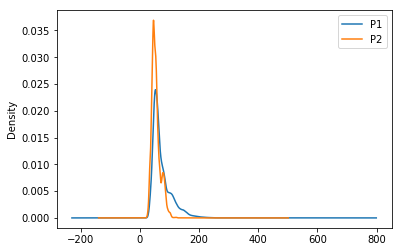

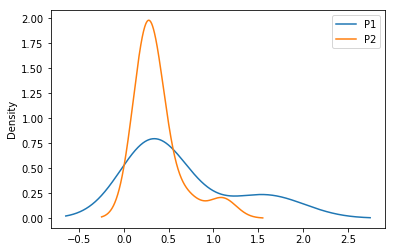

In [10]:
df_sds011.groupby(level=0).plot(kind='kde')

location
3123     AxesSubplot(0.125,0.125;0.775x0.755)
3642     AxesSubplot(0.125,0.125;0.775x0.755)
6367     AxesSubplot(0.125,0.125;0.775x0.755)
8732     AxesSubplot(0.125,0.125;0.775x0.755)
10574    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

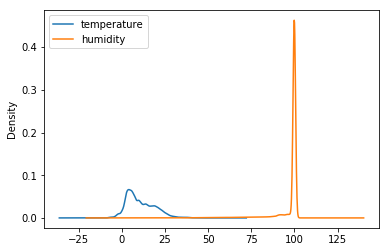

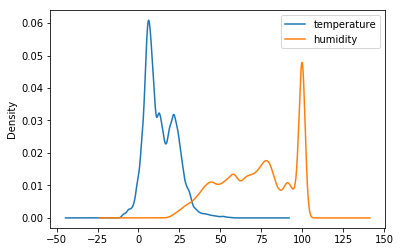

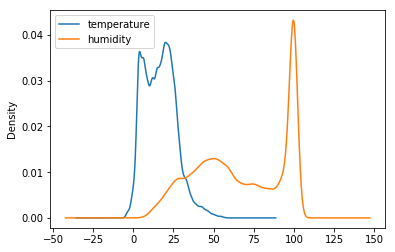

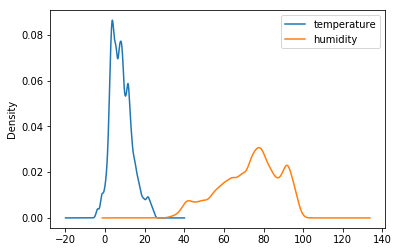

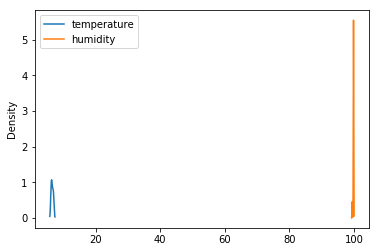

In [11]:
df_dht22.groupby(level=0).plot( kind='kde')

# Outliers

In [12]:
def remove_outlier(df):
    print(df.groupby(level=0).count())
    res = df[np.abs(df - df.mean()) <= (3*df.std())]
    print(res.groupby(level=0).count())
    
    return res


df_sds011 = remove_outlier(df_sds011)
df_dht22 = remove_outlier(df_dht22)

              P1      P2
location                
3123      264096  264096
3642      248374  248374
6367      161817  161817
8732       65543   65543
10574         13      13
              P1      P2
location                
3123      255362  262367
3642      247752  248098
6367      161382  161655
8732       59956   54356
10574         13      13
          temperature  humidity
location                       
3123           266982    266982
3642           248466    248466
6367           162158    162158
8732            65560     65560
10574              13        13
          temperature  humidity
location                       
3123           266692    266982
3642           246017    248466
6367           158905    161820
8732            65560     65560
10574              13        13


In [13]:
df_sds011.describe()

,P1,P2
count,724465.000000,726489.000000
mean,24.062109,14.505671
std,24.811417,15.025882
min,0.000000,0.000000
25%,6.800000,3.730000
50%,13.700000,8.100000
75%,33.200000,20.070000
max,122.600000,68.230000


In [14]:
df_dht22.describe()

,temperature,humidity
count,737187.000000,742841.000000
mean,12.384267,80.175911
std,8.754172,23.235694
min,-10.400000,10.400000
25%,5.400000,62.700000
50%,10.700000,91.300000
75%,19.000000,99.900000
max,40.200000,99.900000


In [15]:
#_ = df_dht22.boxplot(by='location')
#_ = df_sds011.boxplot(by='location')

location
3123     AxesSubplot(0.125,0.125;0.775x0.755)
3642     AxesSubplot(0.125,0.125;0.775x0.755)
6367     AxesSubplot(0.125,0.125;0.775x0.755)
8732     AxesSubplot(0.125,0.125;0.775x0.755)
10574    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

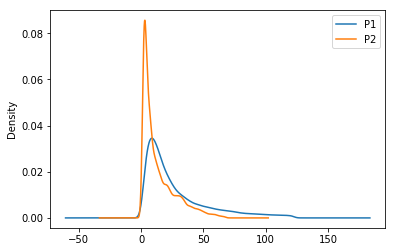

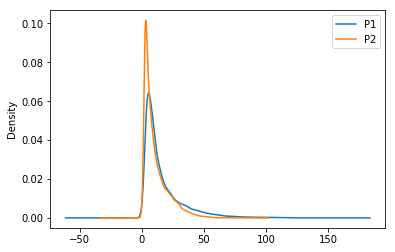

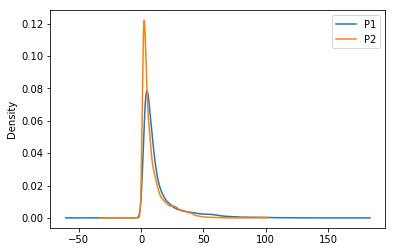

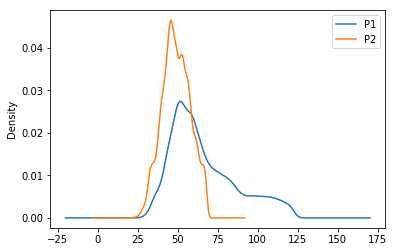

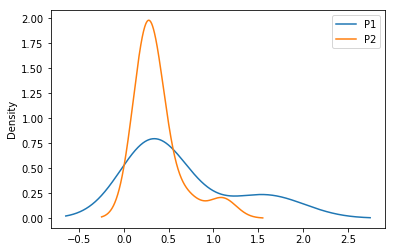

In [16]:
df_sds011.groupby(level=0).plot(kind='kde')

location
3123     AxesSubplot(0.125,0.125;0.775x0.755)
3642     AxesSubplot(0.125,0.125;0.775x0.755)
6367     AxesSubplot(0.125,0.125;0.775x0.755)
8732     AxesSubplot(0.125,0.125;0.775x0.755)
10574    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

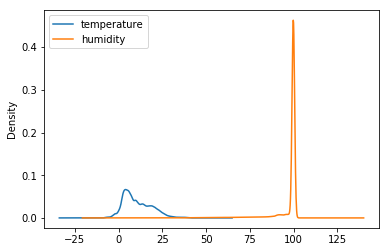

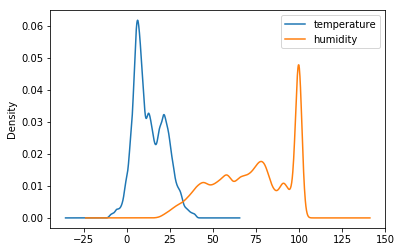

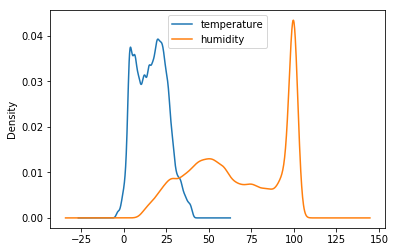

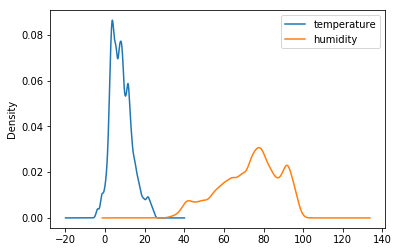

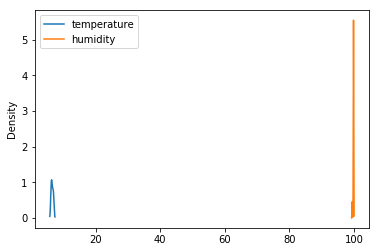

In [18]:
df_dht22.groupby(level=0).plot(kind='kde')

In [19]:
df_sds011.groupby(level=0).describe()

P1                                                           \
             count       mean        std   min    25%    50%    75%     max   
location                                                                      
3123      255362.0  27.619613  25.648458   0.5   9.63  18.20  36.70  122.60   
3642      247752.0  16.684956  16.793383   0.0   6.00  10.53  21.03  122.53   
6367      161382.0  14.154876  16.518916   0.5   4.60   8.07  15.95  122.58   
8732       59956.0  66.066350  20.721730  27.5  50.77  60.33  77.87  122.60   
10574         13.0   0.653846   0.583246   0.2   0.30   0.40   0.80    1.90   

                P2                                                           
             count       mean        std    min    25%    50%    75%    max  
location                                                                     
3123      262367.0  13.770121  13.456263   0.50   3.73   8.30  19.87  68.23  
3642      248098.0  11.066538   9.804293   0.00   3.93   7.53  15.03  68.20  
6367      161655.0   9.347188   9.972261   0.47   2.73   5.50  11.77  67.77  
8732       54356.0  49.098064   8.757548  20.83  43.07  48.73  55.40  68.23  
10574         13.0   0.374615   0.256633   0.20   0.20   0.30   0.40   1.10

In [20]:
df_dht22.groupby(level=0).describe()

temperature                                                    \
               count       mean       std   min  25%   50%   75%   max   
location                                                                 
3123        266692.0  10.649204  8.026487  -9.2  4.4   8.9  16.4  40.2   
3642        246017.0  13.036191  9.040658 -10.4  6.0  11.4  20.3  40.2   
6367        158905.0  16.022011  9.112914  -4.5  8.2  16.2  22.8  40.2   
8732         65560.0   8.179922  5.297322  -4.9  4.2   7.6  11.5  25.1   
10574           13.0   6.553846  0.301705   6.2  6.3   6.5   6.8   7.0   

          humidity                                                      
             count       mean        std   min   25%   50%   75%   max  
location                                                                
3123      266982.0  97.263389   8.949991  19.5  99.9  99.9  99.9  99.9  
3642      248466.0  72.235201  21.903673  17.3  54.9  74.1  93.5  99.9  
6367      161820.0  67.065814  27.368277  10.4  44.1  65.8  98.4  99.9  
8732       65560.0  73.039959  14.862795  32.4  63.0  75.2  84.2  99.9  
10574         13.0  99.869231   0.110940  99.5  99.9  99.9  99.9  99.9

In [21]:
df_sds011 = df_sds011.drop([3123, 10574], level=0)
df_dht22 = df_dht22.drop([3123, 10574], level=0)

# Resample and Merge

In [22]:
def resample(df, freq='60min'):
    level_values = df.index.get_level_values
    return df.groupby([level_values(0)] + [pd.Grouper(freq=freq, level=1)]).mean().dropna()

In [23]:

df_sds011 = resample(df_sds011)
df_dht22 = resample(df_dht22)

In [24]:
print(df_sds011.shape, df_dht22.shape)

(19606, 2) (19986, 2)


In [25]:
data = pd.merge(df_sds011, df_dht22, left_index=True, right_index=True, how='inner')
data = data[data.humidity <= 70.0]
print(data.shape)

(8870, 4)


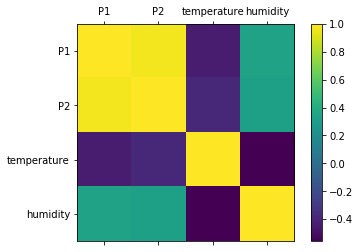

In [26]:
import matplotlib.pyplot as plt

alpha = list(data.columns.values)

fig = plt.figure()

ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1222af940>,
      dtype=object)

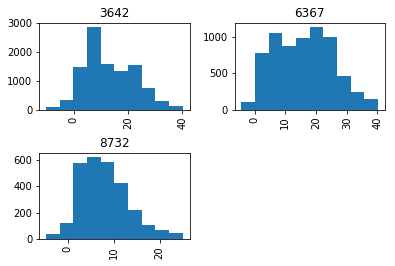

In [27]:
bins = int(len(range(int(df_dht22.temperature.min()), int(df_dht22.temperature.max()))) / 5 )
df_dht22[['temperature']].hist(bins=bins, by='location')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121d086a0>,
      dtype=object)

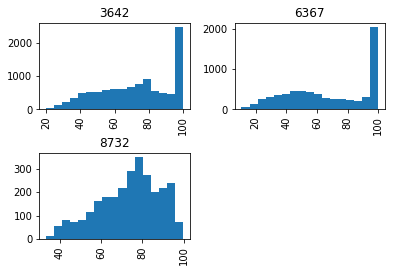

In [28]:
bins = int(len(range(int(df_dht22.humidity.min()), int(df_dht22.humidity.max()))) / 5 )
df_dht22[['humidity']].hist(bins=bins, by='location')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a0930f0>,
      dtype=object)

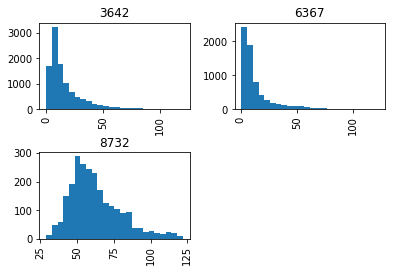

In [112]:
bins = int(len(range(int(df_sds011['P1'].min()), int(df_sds011['P1'].max()))) / 5 )
df_sds011[['P1']].hist(bins=bins, by='location')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125e63b38>,
      dtype=object)

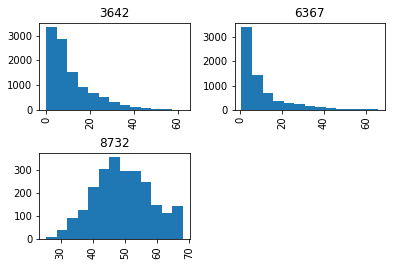

In [29]:
bins = int(len(range(int(df_sds011['P2'].min()), int(df_sds011['P2'].max()))) / 5 )
df_sds011[['P2']].hist(bins=bins, by='location')